In [3]:
import pandas as pd
filter_file= pd.read_csv('filtered_file.csv')
filter_file

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,6,29/05/2006,29/05/2016,29/05/2017,21/10/1966,10/09/1990,0,13,1,2,...,0,0,2006,87,1598,9927.00,4,P,4.250,1055
1,6,29/05/2006,29/05/2017,29/05/2018,21/10/1966,10/09/1990,0,13,1,2,...,0,0,2006,87,1598,9927.00,4,P,4.250,1055
2,6,29/05/2006,29/05/2018,29/05/2019,21/10/1966,10/09/1990,0,13,1,2,...,0,0,2006,87,1598,9927.00,4,P,4.250,1055
3,7,11/02/2015,11/02/2016,11/02/2017,14/05/1946,24/03/2000,1,3,1,1,...,0,0,2009,109,1396,16550.00,5,P,4.245,1168
4,8,28/05/2001,28/05/2016,28/05/2017,11/05/1941,01/08/1962,0,18,1,2,...,0,0,2001,130,1984,27330.00,4,P,4.547,1310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68954,53435,04/12/2017,04/12/2017,04/12/2018,12/03/1986,26/02/2016,0,2,2,2,...,0,0,2005,140,1968,28050.00,5,D,4.458,1489
68955,53441,22/11/2017,22/11/2017,22/11/2018,08/02/1964,06/05/1982,0,2,1,1,...,0,0,1991,60,1389,11575.49,5,P,4.050,995
68956,53441,22/11/2017,22/11/2018,22/11/2019,08/02/1964,06/05/1982,0,2,1,1,...,0,0,1991,60,1389,11575.49,5,P,4.050,995
68957,53442,19/06/2018,19/06/2018,19/06/2019,01/04/1969,25/03/1988,0,1,1,1,...,1,1,1999,135,1998,21239.77,5,P,4.740,1453


In [4]:
filter_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68959 entries, 0 to 68958
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    68959 non-null  int64  
 1   Date_start_contract   68959 non-null  object 
 2   Date_last_renewal     68959 non-null  object 
 3   Date_next_renewal     68959 non-null  object 
 4   Date_birth            68959 non-null  object 
 5   Date_driving_licence  68959 non-null  object 
 6   Distribution_channel  68959 non-null  int64  
 7   Seniority             68959 non-null  int64  
 8   Policies_in_force     68959 non-null  int64  
 9   Max_policies          68959 non-null  int64  
 10  Max_products          68959 non-null  int64  
 11  Lapse                 68959 non-null  int64  
 12  Date_lapse            24846 non-null  object 
 13  Payment               68959 non-null  int64  
 14  Premium               68959 non-null  float64
 15  Cost_claims_year   

Based on this the missing value mainly lies in date_lapse, type_fuel(a very few and length cuz bikes/no door vehicles dont have length)

In [5]:
target=filter_file['Cost_claims_year']
print(target.describe())
print(target.quantile([0.90,0.95,0.99]))

count     68959.000000
mean        235.048962
std        1822.256673
min           0.000000
25%           0.000000
50%           0.000000
75%          63.340000
max      260853.240000
Name: Cost_claims_year, dtype: float64
0.90     579.3480
0.95     949.1100
0.99    3832.8568
Name: Cost_claims_year, dtype: float64


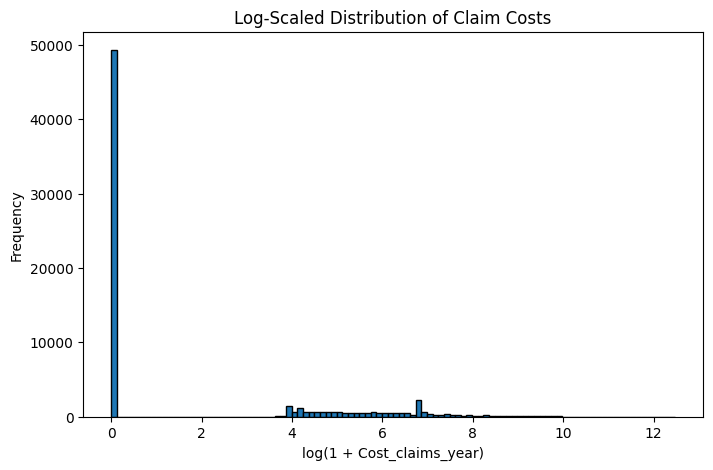

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(np.log1p(filter_file['Cost_claims_year']), bins=100, edgecolor='k')
plt.title('Log-Scaled Distribution of Claim Costs')
plt.xlabel('log(1 + Cost_claims_year)')
plt.ylabel('Frequency')
plt.show()


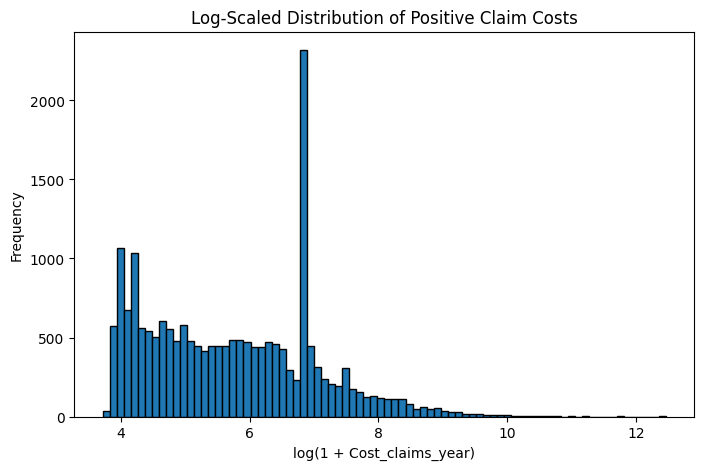

In [9]:
claims_positive = filter_file[filter_file['Cost_claims_year'] > 0]['Cost_claims_year']

plt.figure(figsize=(8,5))
plt.hist(np.log1p(claims_positive), bins=80, edgecolor='k')
plt.title('Log-Scaled Distribution of Positive Claim Costs')
plt.xlabel('log(1 + Cost_claims_year)')
plt.ylabel('Frequency')
plt.show()

In [10]:
claims_positive = filter_file[filter_file['Cost_claims_year'] > 0]['Cost_claims_year']
print("Number of non-zero claim rows:", len(claims_positive))
print("Total rows in dataset:", len(filter_file))
print("Percentage of positive claims:", len(claims_positive) / len(filter_file) * 100)

Number of non-zero claim rows: 19646
Total rows in dataset: 68959
Percentage of positive claims: 28.489392247567398


In [11]:
numeric_cols = [
    'Premium', 'Value_vehicle', 'Power', 'Cylinder_capacity',
    'Weight', 'Length', 'Seniority', 'R_Claims_history', 'N_claims_history'
]

In [12]:
subset = filter_file[numeric_cols + ['Cost_claims_year']].dropna()

In [13]:
corr_raw = subset.corr()['Cost_claims_year'].sort_values(ascending=True)
corr_log = subset.corrwith(np.log1p(subset['Cost_claims_year'])).sort_values(ascending=True)

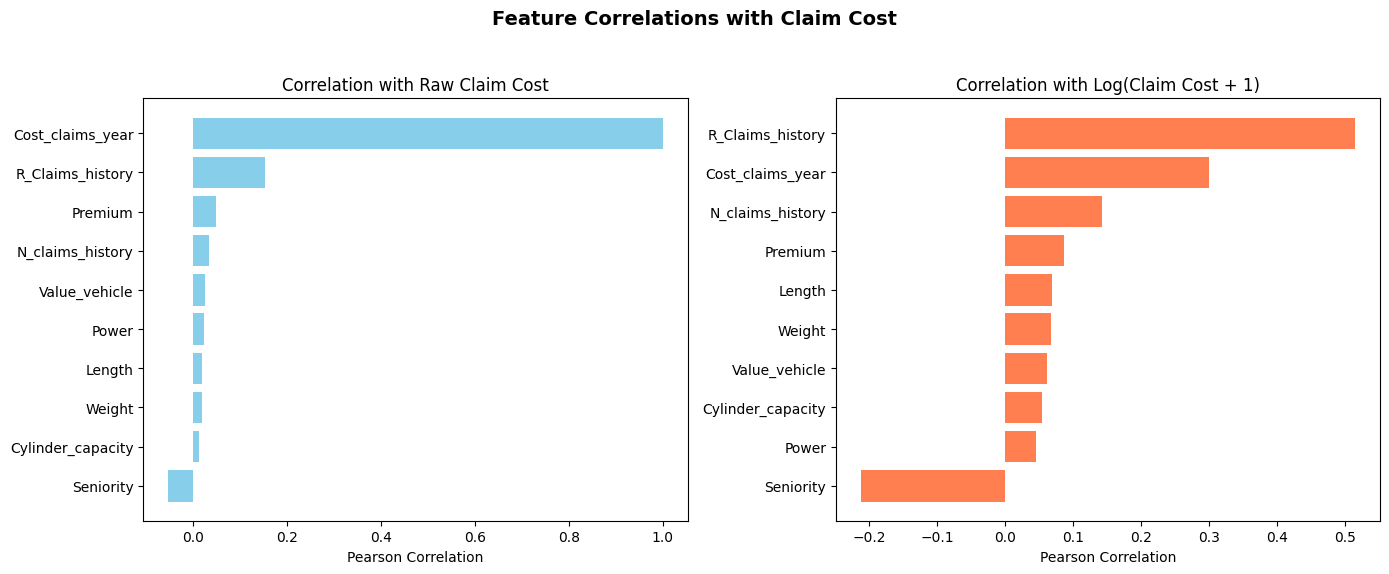

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(corr_raw.index, corr_raw.values, color='skyblue')
axes[0].set_title('Correlation with Raw Claim Cost', fontsize=12)
axes[0].set_xlabel('Pearson Correlation')

axes[1].barh(corr_log.index, corr_log.values, color='coral')
axes[1].set_title('Correlation with Log(Claim Cost + 1)', fontsize=12)
axes[1].set_xlabel('Pearson Correlation')

plt.suptitle('Feature Correlations with Claim Cost', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [22]:
corr_raw_table = corr_raw.drop('Cost_claims_year', errors='ignore')
corr_log_table = corr_log.drop('Cost_claims_year', errors='ignore')

corr_summary = pd.DataFrame({
    'Correlation (Raw Target)': corr_raw_table.round(3),
    'Correlation (Log Target)': corr_log_table.round(3)
}).sort_values(by='Correlation (Log Target)', ascending=False)

print("Feature Correlations with Claim Cost")
display(corr_summary)


Feature Correlations with Claim Cost


,Correlation (Raw Target),Correlation (Log Target)
R_Claims_history,0.153,0.514
N_claims_history,0.034,0.142
Premium,0.050,0.086
Length,0.019,0.069
Weight,0.019,0.067
Value_vehicle,0.026,0.061
Cylinder_capacity,0.013,0.054
Power,0.023,0.045
Seniority,-0.054,-0.213
